**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "umap"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_log2p.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_mean0.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.tsv 
umap.metric_euclidean.neighbors_015.coverage.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_log2p.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_mean0.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.merge.encode_chipseq_full_log2p.fcc_zscore.tss.encode_chromatin_states.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_merge = dat
print(dim(dat))
head(dat)

[1] 150041    555


Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,⋯,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.93242936,1.202217,0.3674175,1.1781314,1.510638,0.6818927,0.5918414,0.3212089,1.029037,⋯,0,1,0,0,0,0,0,0,0,0
chr1:100036895-100039189,2.89957396,3.910099,0.4091536,1.1978119,1.069881,4.9478111,5.5219678,4.1772959,4.663171,⋯,1,0,0,1,0,0,1,0,0,0
chr1:100046252-100046533,0.04290946,1.091537,0.4388560,0.5386822,2.148905,1.2418524,1.1294906,3.5795422,1.101003,⋯,0,1,0,0,0,0,0,0,1,0
chr1:100048290-100048918,0.50936952,1.485267,0.5898186,1.1814556,1.987656,1.4118059,0.9708391,3.5167590,1.229560,⋯,0,1,0,0,0,0,0,0,1,0
chr1:100050225-100050529,0.85668617,1.725008,0.2278687,1.9307771,1.923699,1.8979684,1.0077673,3.0457400,1.339075,⋯,0,0,0,0,0,0,0,1,0,0
chr1:100064757-100065161,0.42353622,1.240632,0.4025945,1.5630312,1.592914,0.5568443,0.7069882,1.2316843,1.420641,⋯,0,0,0,0,0,0,0,1,0,0


In [8]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "atac_full",
    "umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::left_join(mat_region_annot_merge, by = "Region")

dat_umap_chipseq_fcc_v0 = dat
print(dim(dat))
head(dat)

[1] 150041    557


UMAP1,UMAP2,Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,⋯,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.376608,0.4413169,chr1:100028014-100029653,0.93242936,1.202217,0.3674175,1.1781314,1.510638,0.6818927,0.5918414,⋯,0,1,0,0,0,0,0,0,0,0
10.340736,7.2409680,chr1:100036895-100039189,2.89957396,3.910099,0.4091536,1.1978119,1.069881,4.9478111,5.5219678,⋯,1,0,0,1,0,0,1,0,0,0
9.060906,0.8536728,chr1:100046252-100046533,0.04290946,1.091537,0.4388560,0.5386822,2.148905,1.2418524,1.1294906,⋯,0,1,0,0,0,0,0,0,1,0
10.663978,1.7761862,chr1:100048290-100048918,0.50936952,1.485267,0.5898186,1.1814556,1.987656,1.4118059,0.9708391,⋯,0,1,0,0,0,0,0,0,1,0
11.549587,2.4937892,chr1:100050225-100050529,0.85668617,1.725008,0.2278687,1.9307771,1.923699,1.8979684,1.0077673,⋯,0,0,0,0,0,0,0,1,0,0
7.717647,0.1415558,chr1:100064757-100065161,0.42353622,1.240632,0.4025945,1.5630312,1.592914,0.5568443,0.7069882,⋯,0,0,0,0,0,0,0,1,0,0


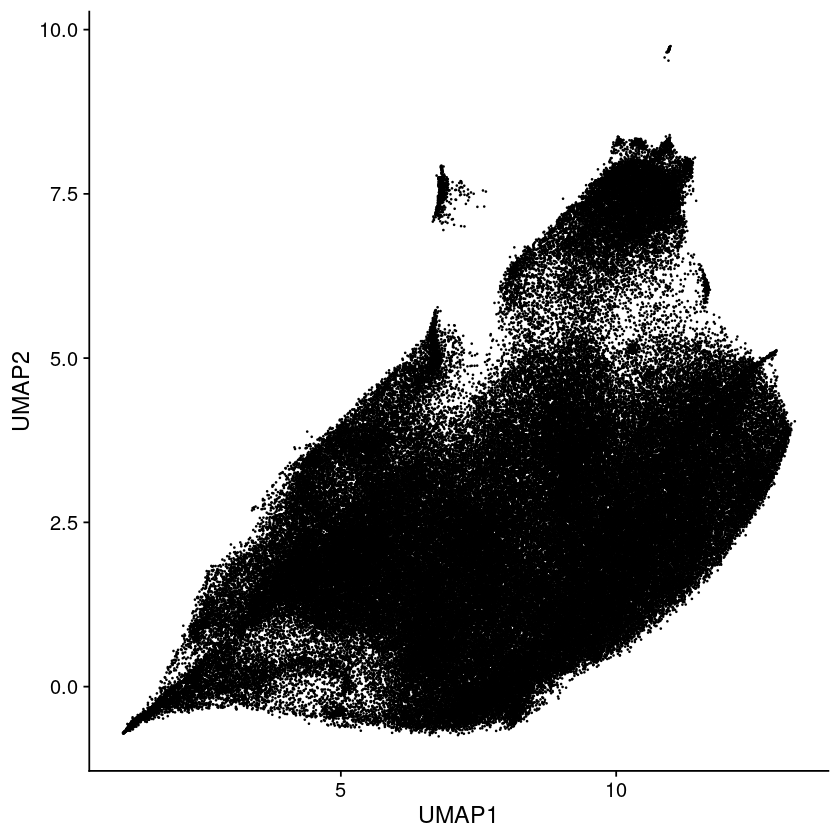

In [9]:
dat = dat_umap_chipseq_fcc_v0
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
    geom_point(size=0.1) + 
    theme_cowplot()
print(gpt)

In [10]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote1",
    "umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::left_join(mat_region_annot_merge, by = "Region")

dat_umap_chipseq_fcc_v1 = dat
print(dim(dat))
head(dat)

[1] 100454    557


UMAP1,UMAP2,Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,⋯,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.088810,0.5304712,chr1:100028014-100029653,0.9324294,1.2022171,0.3674175,1.178131,1.5106379,0.68189269,0.5918414,⋯,0,1,0,0,0,0,0,0,0,0
10.216644,7.1285070,chr1:100036895-100039189,2.8995740,3.9100994,0.4091536,1.197812,1.0698812,4.94781107,5.5219678,⋯,1,0,0,1,0,0,1,0,0,0
10.143445,1.5074078,chr1:100048290-100048918,0.5093695,1.4852671,0.5898186,1.181456,1.9876556,1.41180585,0.9708391,⋯,0,1,0,0,0,0,0,0,1,0
7.676871,0.5485025,chr1:100088179-100088721,0.5397187,1.1473262,0.3921701,1.940593,0.7008170,0.61212882,0.6000525,⋯,0,1,0,0,0,0,0,0,0,0
9.170445,1.4688607,chr1:100090676-100091265,0.8778377,1.4972342,0.3649349,1.307620,1.0818935,0.62258837,0.5671691,⋯,0,1,0,0,0,0,0,0,0,0
7.087734,0.1567945,chr1:100092544-100092869,0.8467990,0.9788868,0.3464503,1.681060,0.5517434,0.07686443,0.6608232,⋯,0,1,0,0,0,0,0,0,0,0


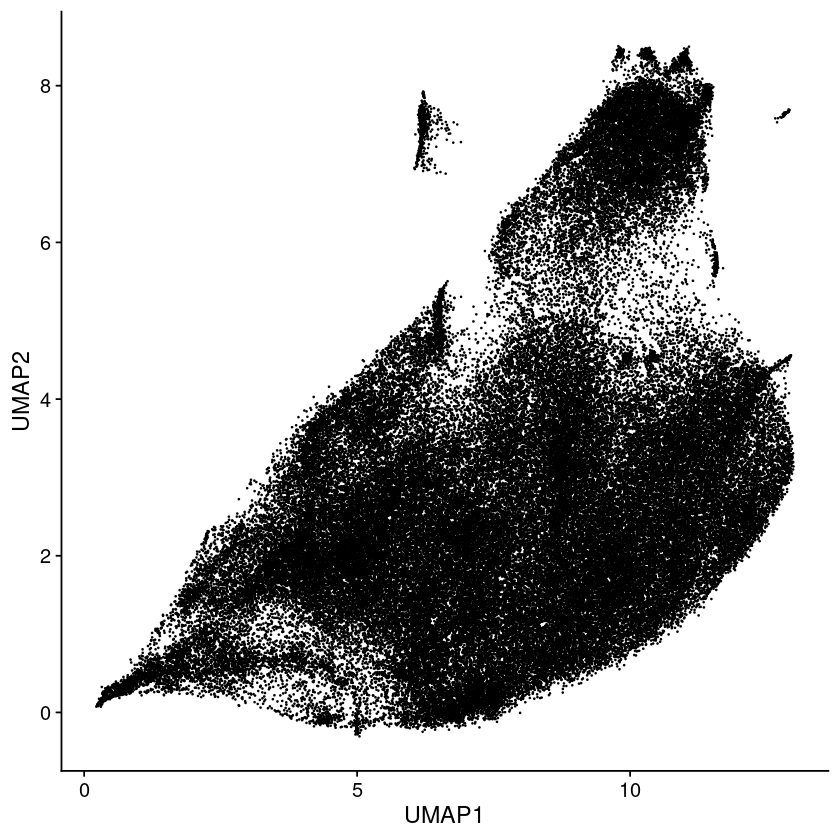

In [11]:
dat = dat_umap_chipseq_fcc_v1
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
    geom_point(size=0.1) + 
    theme_cowplot()
print(gpt)

In [12]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::left_join(mat_region_annot_merge, by = "Region")

dat_umap_chipseq_fcc_v2 = dat
print(dim(dat))
head(dat)

[1] 33953   557


UMAP1,UMAP2,Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,⋯,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.820889,4.889557,chr1:100036895-100039189,2.899574,3.910099,0.4091536,1.1978119,1.0698812,4.947811,5.521968,⋯,1,0,0,1,0,0,1,0,0,0
9.839867,5.589827,chr1:100132375-100133491,3.511342,3.432175,0.3423994,0.7661698,0.6115988,4.537458,5.160366,⋯,1,0,0,1,0,0,1,0,0,0
7.427283,3.893123,chr1:100248956-100250290,3.124214,3.025243,0.6761180,0.9580137,0.9506980,5.075772,5.154976,⋯,1,0,0,1,0,0,1,0,0,0
7.746704,4.251985,chr1:100265562-100266994,3.496910,3.284969,0.5231208,1.0643310,1.2245651,4.710806,5.403491,⋯,1,0,0,1,0,0,1,0,0,0
9.139937,3.863763,chr1:10032429-10033763,3.354819,3.412492,0.3158479,0.5907845,1.1493657,4.590871,4.823100,⋯,1,0,0,1,1,0,1,0,0,0
8.119196,5.155602,chr1:100351018-100353268,3.431313,3.486508,0.3536959,0.6709228,1.4626097,4.578389,5.139823,⋯,1,0,0,1,0,1,1,0,0,0


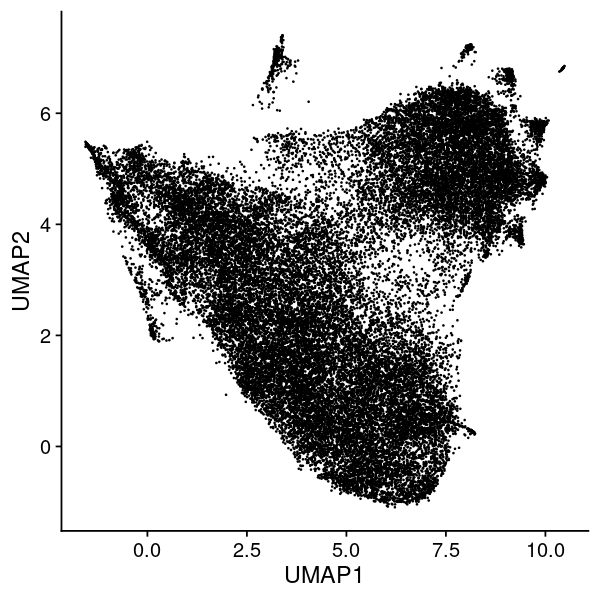

In [21]:
dat = dat_umap_chipseq_fcc_v2
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
    geom_point(size=0.1) + 
    theme_cowplot()
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

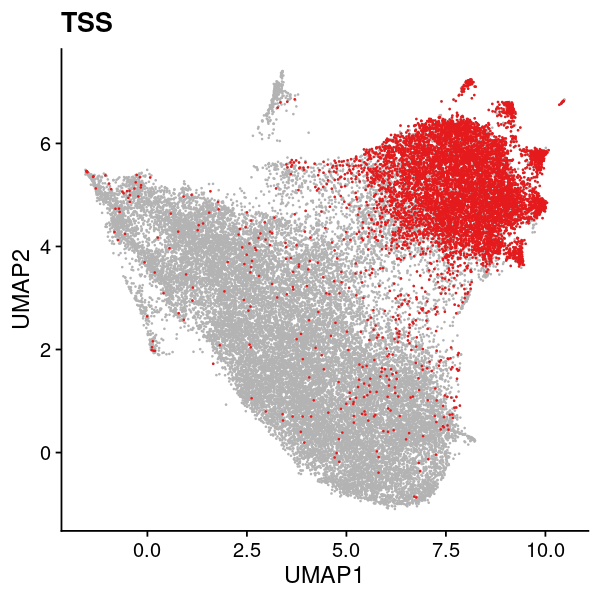

In [14]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(TSS == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#e41a1c", size = 0.1) +
    theme_cowplot() +
    labs(title = "TSS")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

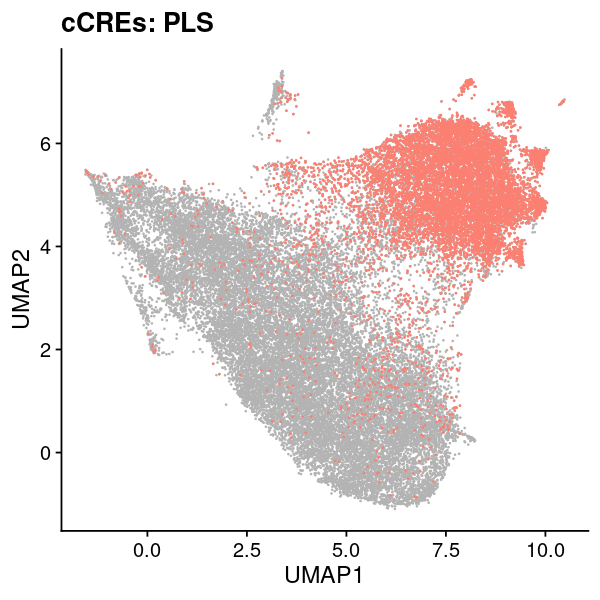

In [15]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(PLS == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#fb8072", size = 0.1) +
    theme_cowplot() +
    labs(title = "cCREs: PLS")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

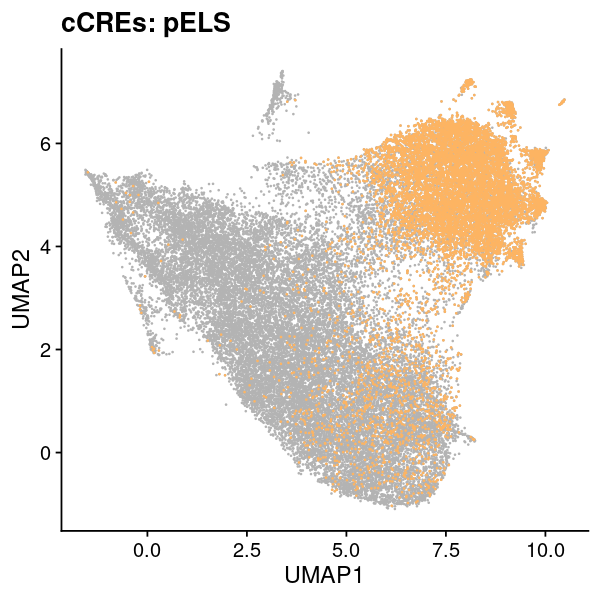

In [16]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(pELS == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#fdb462", size = 0.1) +
    theme_cowplot() +
    labs(title = "cCREs: pELS")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

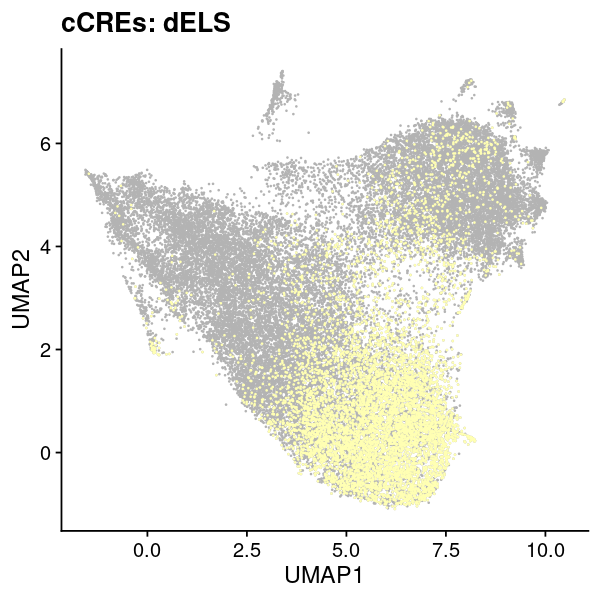

In [17]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(dELS == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#ffffb3", size = 0.1) +
    theme_cowplot() +
    labs(title = "cCREs: dELS")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

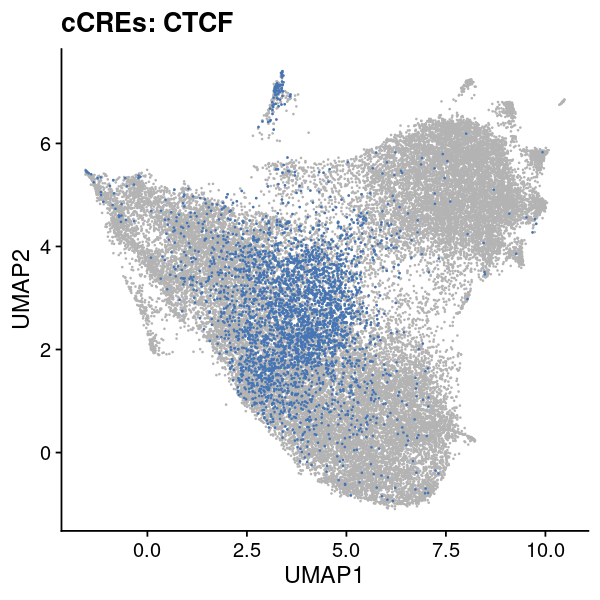

In [18]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(`CA-CTCF` == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#4575b4", size = 0.1) +
    theme_cowplot() +
    labs(title = "cCREs: CTCF")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

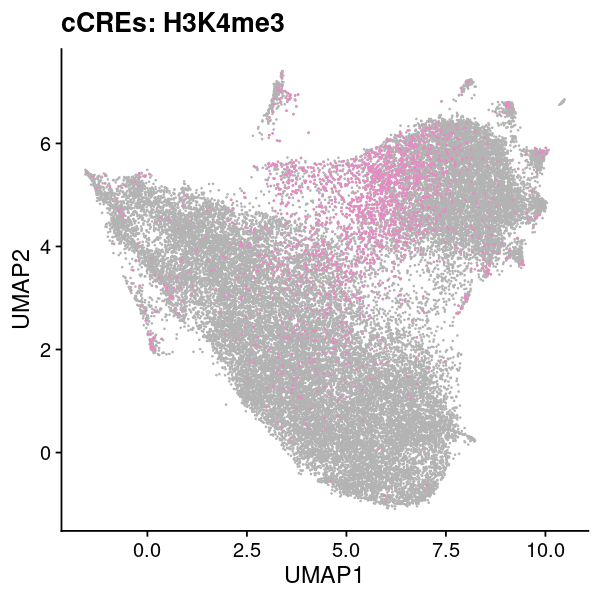

In [19]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(`CA-H3K4me3` == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#e78ac3", size = 0.1) +
    theme_cowplot() +
    labs(title = "cCREs: H3K4me3")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

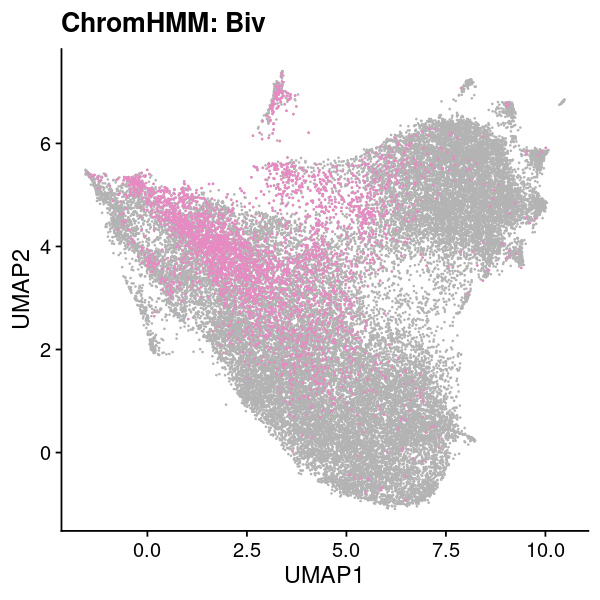

In [20]:
dat = dat_umap_chipseq_fcc_v2

tmp = dat %>% dplyr::filter(`Biv` == 1)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70",  size = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "#e78ac3", size = 0.1) +
    theme_cowplot() +
    labs(title = "ChromHMM: Biv")
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)